Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [45]:
import os
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import random
from string import punctuation
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dropout,MaxPool1D,Dense,Embedding,Flatten,concatenate,Conv1D
import pickle
from tensorflow.keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("IMDB Dataset.csv")
df.shape

(50000, 2)

In [47]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [48]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [49]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
t=str.maketrans("","",punctuation)
s="salam@"
s.translate(t)

'salam'

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sina's
[nltk_data]     Pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stop_words=stopwords.words('english')

In [53]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [54]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Sina's
[nltk_data]     Pc/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
positive = []
negative = []

for index, row in df.iterrows():
    if row['sentiment'] == 'positive':
        positive.append(row)
    elif row['sentiment'] == 'negative':
        negative.append(row)

In [56]:
len(positive)

25000

In [57]:
positive[0]

review       One of the other reviewers has mentioned that ...
sentiment                                             positive
Name: 0, dtype: object

In [58]:
negative_document=[]
max_len_neg=0
for ne in negative:
    ne=ne[0]
    tokens = word_tokenize(ne)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_neg:
      max_len_neg=len(tokens)

    negative_document.append(" ".join(tokens))

print(len(negative_document))

C:\Users\Sina's Pc\AppData\Local\Temp\ipykernel_10652\1684628552.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ne=ne[0]


25000


In [59]:
positive_document=[]
max_len_pos=0
for pos in positive:
    pos=pos[0]
    tokens = word_tokenize(pos)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_pos:
      max_len_pos=len(tokens)

    positive_document.append(" ".join(tokens))

print(len(positive_document))

C:\Users\Sina's Pc\AppData\Local\Temp\ipykernel_10652\3988056002.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos=pos[0]


25000


In [60]:
positive_document[0]

'One reviewers mentioned watching 1 Oz episode hooked  They right  exactly happened  br    br   The first thing struck Oz brutality unflinching scenes violence  set right word GO  Trust  show faint hearted timid  This show pulls punches regards drugs  sex violence  Its hardcore  classic use word  br    br   It called OZ nickname given Oswald Maximum Security State Penitentary  It focuses mainly Emerald City  experimental section prison cells glass fronts face inwards  privacy high agenda  Em City home many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish  scuffles  death stares  dodgy dealings shady agreements never far away  br    br   I would say main appeal show due fact goes shows would nt dare  Forget pretty pictures painted mainstream audiences  forget charm  forget romance  OZ nt mess around  The first episode I ever saw struck nasty surreal  I could nt say I ready  I watched  I developed taste Oz  got accustomed high levels graphic violence  Not violence  injust

In [61]:
max_len=max(max_len_neg,max_len_pos)

In [62]:
random.shuffle(positive_document)
random.shuffle(negative_document)

In [63]:
train_data=negative_document[:20000]+positive_document[:20000]
len(train_data)

40000

In [64]:
train_y = [0 for i in range(20000)]+[1 for i in range(20000)]

In [65]:
len(train_y)

40000

In [66]:
test_data=negative_document[20000:]+positive_document[20000:]
len(test_data)

10000

In [67]:
test_y = [0 for i in range(5000)]+[1 for i in range(5000)]

In [68]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data)

In [69]:
with open("tokenizer.h5",mode="wb") as f:
  pickle.dump(tokenizer,f)

In [70]:
encode = tokenizer.texts_to_sequences(train_data)

In [71]:
encode[0]

[2,
 343,
 26,
 46,
 7439,
 2,
 47,
 611,
 2,
 43,
 31,
 2,
 43,
 16,
 2,
 97,
 6,
 60,
 139,
 8,
 3,
 46,
 7439,
 1386,
 911,
 1609,
 9,
 281,
 179,
 278,
 16,
 3,
 44,
 9975,
 858,
 26,
 4,
 5468,
 1044,
 462,
 7748,
 7912,
 372,
 339,
 1289,
 461,
 6791,
 1408,
 303,
 397,
 339,
 1609,
 7912,
 8541,
 10759,
 6791,
 8541,
 10759,
 675,
 10131,
 10759,
 675,
 157,
 155,
 288,
 1240,
 571,
 858,
 26,
 4,
 30,
 44,
 367,
 1311,
 2609,
 979,
 26,
 4,
 381,
 31,
 385,
 7912,
 107,
 494,
 251,
 1055,
 13623,
 12569,
 2001,
 557,
 343,
 26,
 4,
 2254,
 1488,
 322,
 9085,
 737,
 1035,
 481,
 6,
 490,
 250,
 589,
 250,
 17484,
 11674,
 83,
 855,
 611,
 281,
 541,
 877,
 191,
 2133,
 1990,
 377,
 6,
 83,
 1488,
 26,
 4,
 8,
 859,
 16548,
 728,
 82,
 481,
 311,
 27,
 13,
 8636,
 282,
 308,
 97,
 6,
 209,
 4573,
 7912,
 380,
 1173,
 7,
 40,
 341,
 7261,
 60,
 5635,
 2908,
 63459,
 26,
 4,
 6915,
 16110,
 46,
 19906,
 458,
 181,
 61,
 25,
 11,
 611,
 4,
 98,
 124,
 740,
 3174,
 4466,
 1035,
 949,

In [72]:
padded = pad_sequences(encode,max_len,padding="post")

In [73]:
padded.shape

(40000, 1824)

In [74]:
vocab_len = len(tokenizer.word_index)+1

In [75]:
input1 = Input(shape=(max_len,))
embeding1 = Embedding(vocab_len,100)(input1)
conv1 = Conv1D(filters=128,kernel_size=3,activation='relu')(embeding1)
drop1= Dropout(0.3)(conv1)
pool1=MaxPool1D(pool_size=2)(drop1)
flat1=Flatten()(pool1)
dense1=Dense(10,activation='relu')(flat1)
output=Dense(1,activation='sigmoid')(dense1)

In [76]:
model = Model(inputs=[input1],outputs=output)

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1824)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 1824, 100)      │    12,324,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1822, 128)      │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1822, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 911, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 116608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │     1,166,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,529,129 (51.61 MB)

 Trainable params: 13,529,129 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [80]:
encode_test = tokenizer.texts_to_sequences(test_data)
padded_test = pad_sequences(encode_test,max_len,padding="post")

In [81]:
history = model.fit([padded],np.array(train_y),epochs=10,batch_size=32,validation_data=([padded_test],np.array(test_y)))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 333s 265ms/step - accuracy: 0.8510 - loss: 0.3234 - val_accuracy: 0.9021 - val_loss: 0.2432
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 383s 266ms/step - accuracy: 0.9583 - loss: 0.1156 - val_accuracy: 0.8989 - val_loss: 0.2742
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 334s 267ms/step - accuracy: 0.9873 - loss: 0.0389 - val_accuracy: 0.8849 - val_loss: 0.3668
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 405s 286ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.8762 - val_loss: 0.5545
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 355s 284ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.8729 - val_loss: 0.6845
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 381s 283ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0.8794 - val_loss: 0.7260
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 359s 264ms/step - accuracy: 0.9974 - loss: 0.0076 - val_accuracy: 0.8821 - val_loss: 0.8653
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 386s 268ms/step - ac

In [82]:
test_predictions = (model.predict(padded_test) > 0.5).astype(int).flatten()
precision = precision_score(test_y, test_predictions)
recall = recall_score(test_y, test_predictions)
f1 = f1_score(test_y, test_predictions)
cm = confusion_matrix(test_y, test_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
Precision: 0.8825
Recall: 0.8712
F1-Score: 0.8768


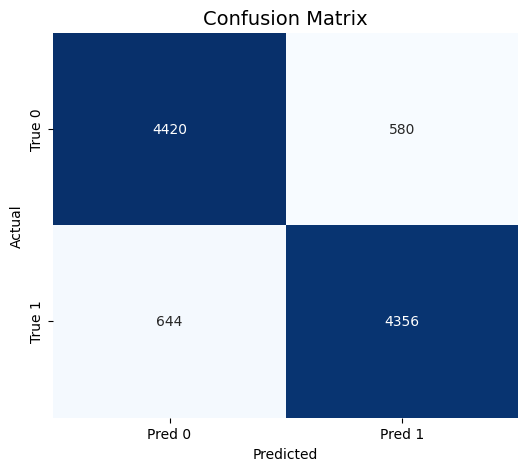

In [83]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Pred 0", "Pred 1"], 
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [84]:
print(classification_report(test_y, test_predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      5000
    Positive       0.88      0.87      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

